In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

进行LS4P后处理，简单检查降水和温度

In [2]:
dir_in ="/raid52/yycheng/LS4P-TPEMIP/reference/"
ds_obs = xr.open_dataset(dir_in + "sel_CN05.1_Pre_1961_2018_daily_025x025.nc")

dir_in ="/raid52/yycheng/LS4P-TPEMIP/merge/WRF_SYS/precip_origin/"
ds_sys = xr.open_dataset(dir_in + "sel_precip_daily.nc")

dir_in ="/raid52/yycheng/LS4P-TPEMIP/merge/NJU/precip_origin/"
ds_nju = xr.open_dataset(dir_in + "sel_precip_daily.nc")

# 整理到字典 mod_var 
var = {}
var['obs'] = ds_obs['pre']
var['sys'] = ds_sys['dailypre']
# 修改nju的坐标，意味着坐标timestep之后的24小时的降水
ds_nju['pr'] = ds_nju['pr'].assign_coords({'time':ds_sys.time})
var['nju']   = ds_nju['pr']

In [19]:
var_monthly = {}
var_monthly['obs'] = {}
var_monthly['nju'] = {}
iyear = 1991
for imonth in range(4, 9, 1):
    time_sel_monthly  = (var['obs'].time.dt.year==iyear) &(var['obs'].time.dt.month.isin([imonth]) ) 

    var_monthly['obs'][imonth] = var['obs'].sel(time=time_sel_monthly).mean('time')
    var_monthly['nju'][imonth] = var['nju'].sel(time=time_sel_monthly).mean('time')

In [17]:
# 
# 降水CMAP
import matplotlib.colors as mcolors
# draw filled contours.
clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
         50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 750]
# In future MetPy
# norm, cmap = ctables.registry.get_with_boundaries('precipitation', clevs)
cmap_data = [
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543)]
            #  (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
            #  (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)

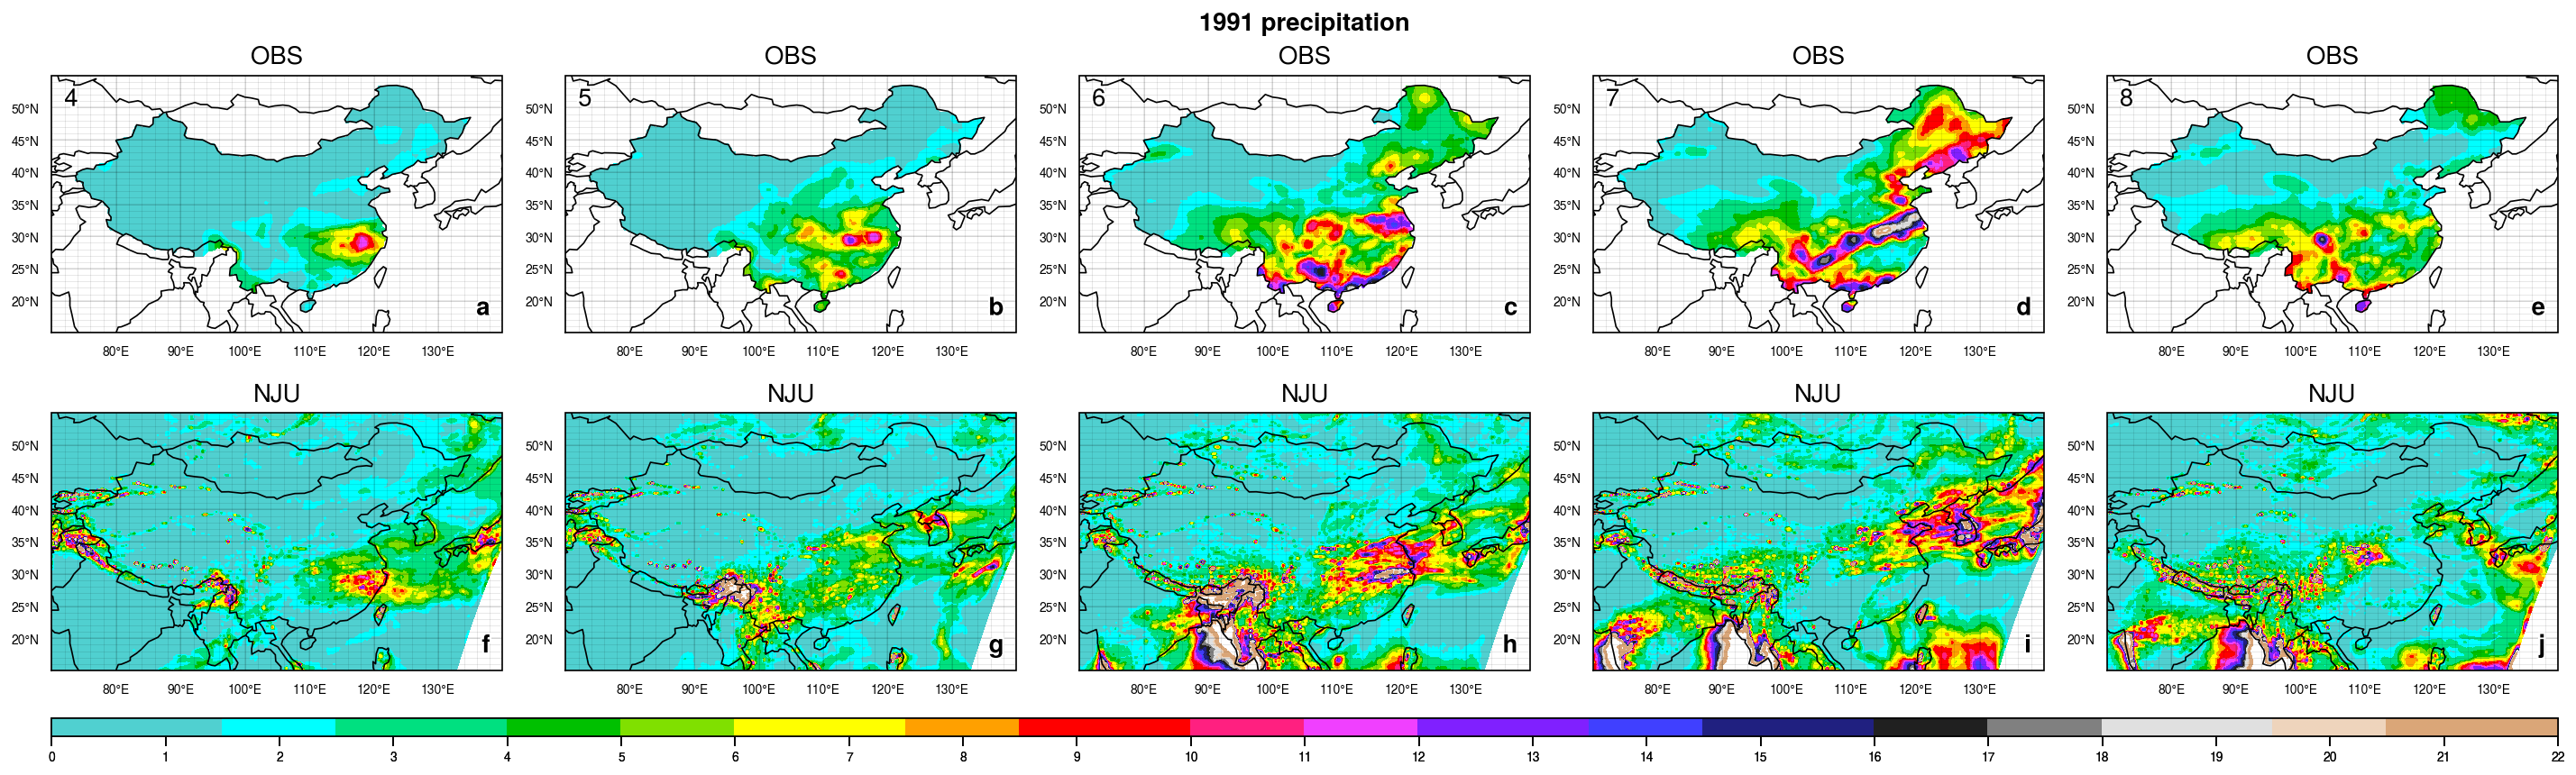

In [25]:
# import proplot as plot
from matplotlib import pyplot as plt
import proplot as plot
# ----- get filter vars coords-----

ticks = np.arange(0,22.5,.5)
#----- create plot -----
fig, axs = plot.subplots(ncols=5, nrows=2, proj=('cyl'))
axs_index = 0
for imonth in range(4, 9):
#-----a m-----
#-----obs-----
    axs[axs_index].format(title='OBS', ultitle=str(imonth))
    # m = axs[axs_index].contour(var_monthly['obs'][imonth].lon, var_monthly['obs'][imonth].lat, var_monthly['obs'][imonth],\
    # levels=ticks[::2], color='k', linewidth = .2,antialiased=False)
    m_overlay = axs[axs_index].contourf(var_monthly['obs'][imonth].lon, var_monthly['obs'][imonth].lat, var_monthly['obs'][imonth],\
    levels=ticks,
    cmap=cmap)
    # fig.colorbar(m_overlay, loc='b', cmap=cmap, width=0.1, ticklabelsize=5,ticks=ticks[::2])
    #-----NJU-----
    axs[axs_index+5].format(title='NJU')
    # m = axs[0].contour(var_monthly['sys'].XLONG, var_monthly['sys'].XLAT, var_monthly['sys'],\
    # levels=ticks[::4], color='k', linewidth = .2)
    m_overlay = axs[axs_index+5].contourf(var_monthly['nju'][imonth].xlon, var_monthly['nju'][imonth].xlat, var_monthly['nju'][imonth],\
    levels=ticks,
    cmap=cmap)

    axs_index = axs_index + 1

fig.colorbar(m_overlay, loc='b', cmap=cmap, width=0.1, ticklabelsize=5,ticks=ticks[::2])

# ---------format作为整个proplot集中对属性进行修改的method---------
axs.format(
lonlim=(70, 140), latlim=(15, 55), coast=True,
#-----GEO axis-----
borders = True,
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
# lonlocator = np.arange(70,150,10),
# latlocator = np.arange(15,65,10),
# lonminorlocator = np.arange(70,140+2,2),
# latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
suptitle=str(iyear) + " precipitation",
abc=True,
abcloc='lr'
)
#----- add contour tick labels -----
# axs.clabel(m, inline=True, fontsize=5, colors = 'k', fmt='%4.0f',use_clabeltext=True, inline_spacing=0)
# fig.colorbar(m_overlay, loc='b', cmap=cmap, width=0.1)
# fig.colorbar(m_overlay, loc='b', length = 1., width=0.1,
# ticklabelsize=5,ticks=ticks)

fig.patch.set_facecolor('white')
plt.savefig('./output_pic/precip_spatial_monthly.png', facecolor= "white")